# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

import pandas_profiling
from pandas_profiling import ProfileReport
from loky import get_reusable_executor


## import the data

In [2]:
test = pd.read_csv('/Users/asaf/Google Drive/Work/Python Scripts/titanic/test.csv')
train = pd.read_csv('/Users/asaf/Google Drive/Work/Python Scripts/titanic/train.csv')

full_data = [train, test]

train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# EDA With pandas_profiling
overview on the data

In [3]:
profile = ProfileReport(train, title='Pandas Profiling Report')
profile

In [4]:
print('Survived', round(train['Survived'].value_counts()[1]/len(train) * 100,2), '% of the dataset')
print('Not Survived', round(train['Survived'].value_counts()[0]/len(train) * 100,2), '% of the dataset')

Survived 38.38 % of the dataset
Not Survived 61.62 % of the dataset


In [5]:
for x in ['Pclass','Sex','SibSp','Parch','Embarked']:
    print('Survival Correlation by:', x)
    print(train.loc[train[x].notnull(),[x, 'Survived']].groupby(x, as_index=False).mean())
    print('-'*10, '\n')

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
---------- 



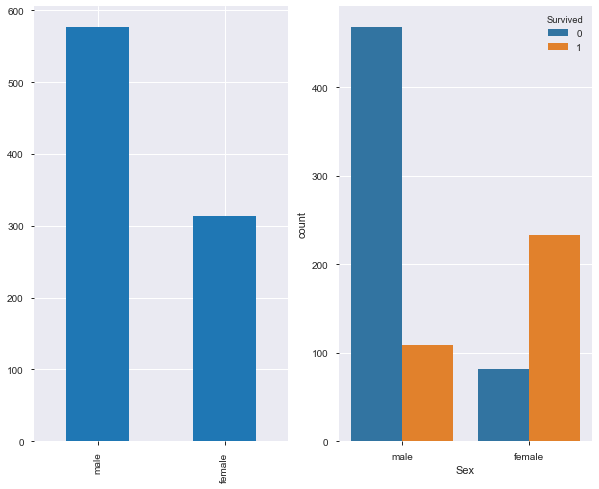

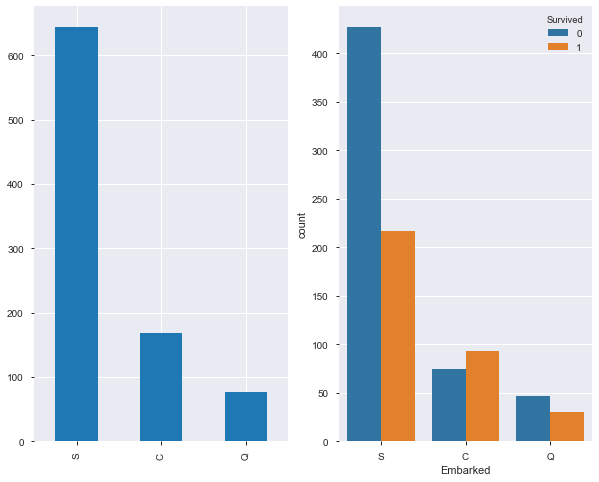

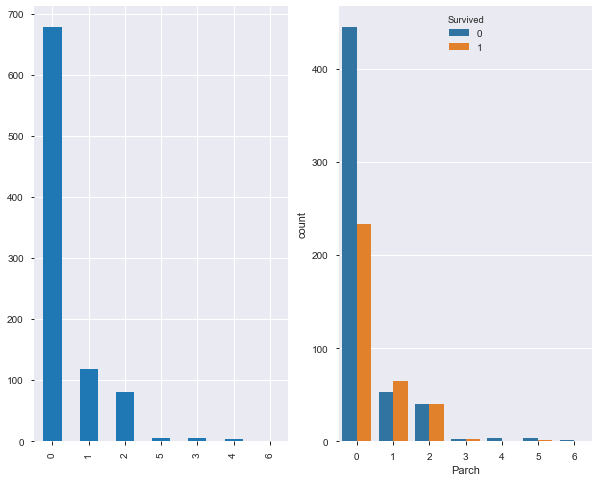

In [6]:
#for i in train.dtypes[object_bol].index:
for i in ['Sex','Embarked','Parch']:
    fig, ax = plt.subplots(1,2, figsize = (10,8))
    train[i].value_counts().plot.bar(ax = ax[0])
    sns.countplot(i,hue = 'Survived', data = train, ax = ax[1])
    plt.show()

Text(0, 0.5, 'Frequency')

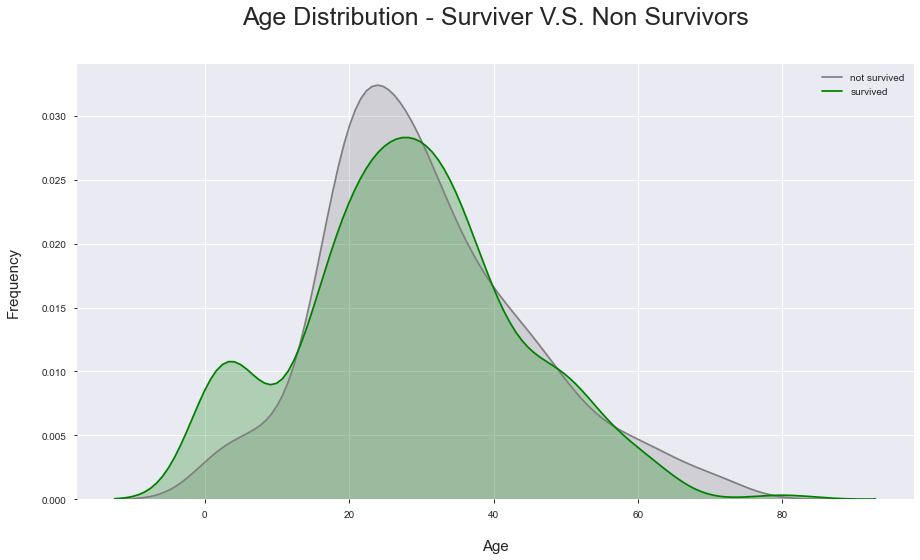

In [7]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20)

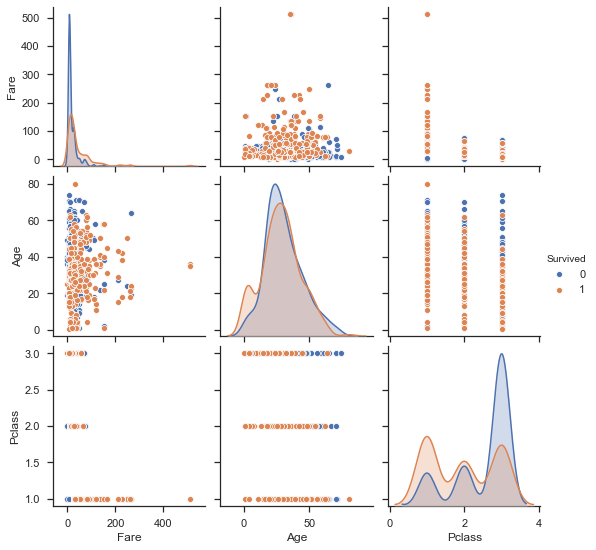

In [8]:
sns.set(style = "ticks",color_codes = True)
sns.pairplot(train, vars = ['Fare','Age','Pclass'],hue = 'Survived')
plt.show()

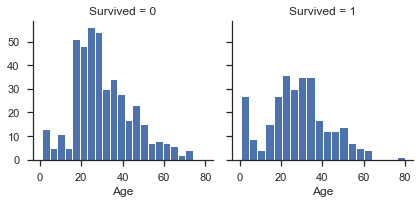

In [9]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

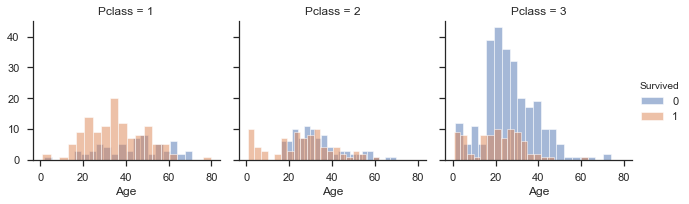

In [10]:
grid = sns.FacetGrid(train, col='Pclass', hue='Survived')

grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

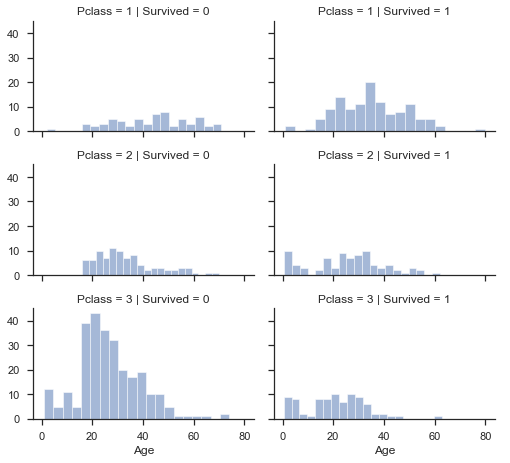

In [11]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

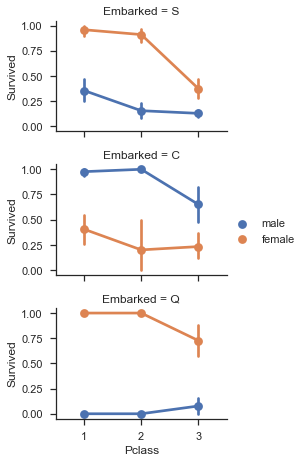

In [12]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

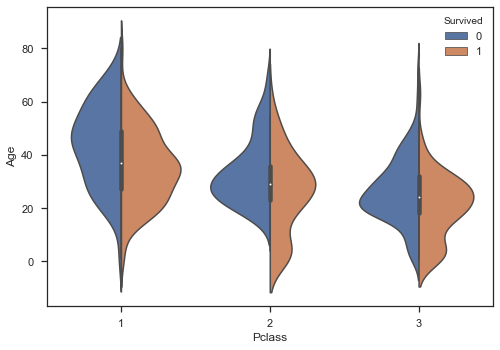

In [13]:
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train, split = True)


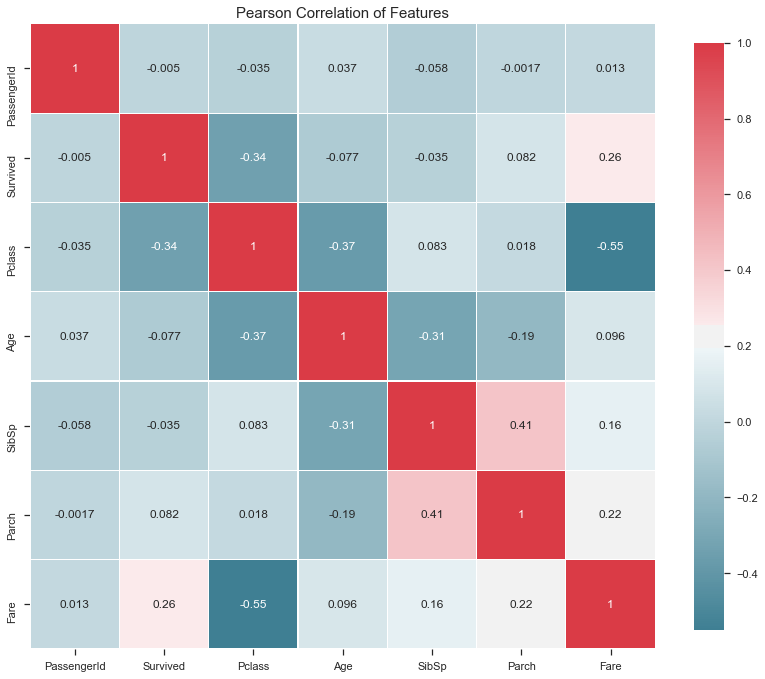

In [14]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

# Feature Engineering

In [15]:
# SibSp and Parch
# With the number of siblings/spouse and the number of children/parents we can create new feature called Family Size.

for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [16]:
# check whether they are alone in this ship or not.
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [17]:
for dataset in full_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [18]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826

In [19]:
#calculated_fare
train['calculated_fare'] = train.Fare/train.FamilySize

In [20]:
#fare_group
def fare_group(fare):
    """
    This function creates a fare group based on the fare provided
    """
    
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train['fare_group'] = train['calculated_fare'].map(fare_group)

## Feature Selection

In [21]:
drop_elements = ['PassengerId', 'Name', 'Ticket','Parch']
train = train.drop(drop_elements,axis = 1)
test = test.drop(drop_elements,axis = 1)

# Missing Values

In [22]:
train.isnull().mean() * 100

Survived            0.000000
Pclass              0.000000
Sex                 0.000000
Age                19.865320
SibSp               0.000000
Fare                0.000000
Cabin              77.104377
Embarked            0.224467
FamilySize          0.000000
IsAlone             0.000000
Title               0.000000
calculated_fare     0.000000
fare_group          0.000000
dtype: float64

In [23]:
test.isnull().mean() * 100

Pclass         0.000000
Sex            0.000000
Age           20.574163
SibSp          0.000000
Fare           0.239234
Cabin         78.229665
Embarked       0.000000
FamilySize     0.000000
IsAlone        0.000000
Title          0.000000
dtype: float64

In [24]:
# too many nulls in Cabin
for dataset in full_data:
    dataset['CabinNull'] = dataset['Cabin'].notnull()

train = train.drop('Cabin',axis = 1)
test = test.drop('Cabin',axis = 1)

## Impute Values KNN + get_dummies

In [25]:
string_cols_full = list(train.loc[:, train.dtypes == np.object].columns[~train.loc[:, train.dtypes == np.object].isnull().any()])
string_cols_missing_v = list(train.loc[:, train.dtypes == np.object].columns[train.loc[:, train.dtypes == np.object].isnull().any()])

#encoding the columns without any missing values
train = pd.get_dummies(train,columns = string_cols_full, drop_first=True)

In [26]:
#from sklearn.impute import SimpleImputer
#imp = SimpleImputer(strategy="most_frequent")
#train['Cabin'] = imp.fit_transform(pd.DataFrame(train['Cabin']))

from fancyimpute import KNN
from sklearn.preprocessing import OrdinalEncoder

#instantiate both packages to use
encoder = OrdinalEncoder()
imputer = KNN()

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in string_cols_missing_v:
    encode(train[columns])

Using TensorFlow backend.


In [27]:
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
train.iloc[:, :] = MICE_imputer.fit_transform(train)
train = pd.get_dummies(train,columns = string_cols_missing_v, drop_first=True)

In [28]:
train.isnull().mean() * 100

Survived                       0.0
Pclass                         0.0
Age                            0.0
SibSp                          0.0
Fare                           0.0
FamilySize                     0.0
IsAlone                        0.0
calculated_fare                0.0
Sex_male                       0.0
Title_Miss                     0.0
Title_Mr                       0.0
Title_Mrs                      0.0
Title_Rare                     0.0
fare_group_high                0.0
fare_group_low                 0.0
fare_group_mid                 0.0
fare_group_very_high           0.0
Embarked_1.0                   0.0
Embarked_1.166025258590686     0.0
Embarked_1.2396958792856905    0.0
Embarked_2.0                   0.0
dtype: float64

# Classifier Comparison

In [29]:
X = train.drop('Survived', axis=1).values
y = train['Survived'].values

# Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

st_scale = StandardScaler()

## transforming "x"
X = st_scale.fit_transform(X)

## Train - Test sep

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)


In [32]:
X

array([[ 0.82737724, -0.54515489,  0.43279337, ..., -0.03352008,
        -0.03352008,  0.61930636],
       [-1.56610693,  0.62223351,  0.43279337, ..., -0.03352008,
        -0.03352008, -1.61470971],
       [ 0.82737724, -0.25330779, -0.4745452 , ..., -0.03352008,
        -0.03352008,  0.61930636],
       ...,
       [ 0.82737724, -0.89560838,  0.43279337, ..., -0.03352008,
        -0.03352008,  0.61930636],
       [-1.56610693, -0.25330779, -0.4745452 , ..., -0.03352008,
        -0.03352008, -1.61470971],
       [ 0.82737724,  0.18446286, -0.4745452 , ..., -0.03352008,
        -0.03352008, -1.61470971]])

## Import & Define the Models

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier



classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "XGBClassifier": XGBClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "BaggingClassifier": BaggingClassifier()
    }

## Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=8, scoring= 'roc_auc')
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% roc_auc score")

Classifiers:  LogisticRegression Has a training score of 87.0 % roc_auc score
Classifiers:  KNeighborsClassifier Has a training score of 86.0 % roc_auc score
Classifiers:  SVC Has a training score of 86.0 % roc_auc score
Classifiers:  DecisionTreeClassifier Has a training score of 77.0 % roc_auc score
Classifiers:  RandomForestClassifier Has a training score of 87.0 % roc_auc score
Classifiers:  ExtraTreesClassifier Has a training score of 83.0 % roc_auc score
Classifiers:  XGBClassifier Has a training score of 89.0 % roc_auc score
Classifiers:  KNeighborsClassifier Has a training score of 86.0 % roc_auc score
Classifiers:  BaggingClassifier Has a training score of 85.0 % roc_auc score


## parameters tuning & find the best model

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

classifiers = {
    "LogisiticRegression":      [LogisticRegression(),
                                    {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],

    "KNearest":                 [KNeighborsClassifier(),
                                    {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}],

    "Support Vector Classifier":[SVC(), 
                                    {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}],

    "DecisionTreeClassifier":   [DecisionTreeClassifier(), 
                                    {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),"min_samples_leaf": list(range(5,7,1))}],

    "RandomForest":             [RandomForestClassifier(), 
                                    {'n_estimators':[140,145,150,155,160,200],'max_depth':range(1,10),'criterion': ['gini', 'entropy']}],

    "ExtraTreesClassifier":     [ExtraTreesClassifier(),
                                    {'n_estimators': [50,126,25],'min_samples_leaf': [20,50,5],'min_samples_split': [15,36,5]}],

    "XGBClassifier":            [XGBClassifier(),
                                    {'max_depth': [2,4,6,60],'n_estimators': [50,100,200]}],

    "KNeighborsClassifier":     [KNeighborsClassifier(),
                                    {'n_neighbors':range(1,8), 'weights':['uniform','distance']}],

    "BaggingClassifier":        [BaggingClassifier(),
                                    {'n_estimators':[10,30,50,70]}]

    }

cvS = StratifiedShuffleSplit(n_splits=5, test_size=.30, random_state=15)
models = []
scores = []

for key, classifier in classifiers.items():
    model = GridSearchCV(classifier[0],classifier[1],cv=cvS, scoring = 'roc_auc')
    model.fit(X_train, y_train)
    models.append(model)
    scores.append(model.best_score_)
    print(model.best_estimator_.__class__.__name__,": ",round(model.best_score_ * 100, 2).astype(str) + '%')

## taking the best model
best_model = models[np.argmax(scores)].best_estimator_



LogisticRegression :  86.85%
KNeighborsClassifier :  86.61%
SVC :  87.95%
DecisionTreeClassifier :  86.22%
RandomForestClassifier :  89.36%
ExtraTreesClassifier :  87.18%
XGBClassifier :  88.89%
KNeighborsClassifier :  87.27%
BaggingClassifier :  88.71%


## ROC Curve

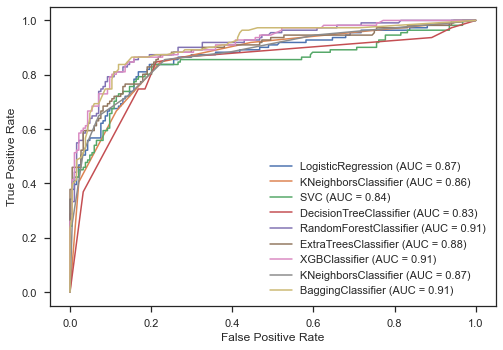

In [36]:
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
for i in models:
    plot_roc_curve(i.best_estimator_, X_test, y_test, ax=ax)

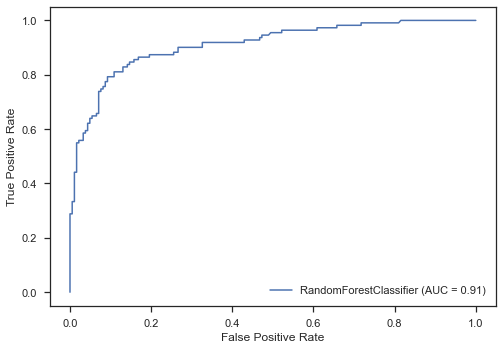

In [37]:
plot_roc_curve(best_model, X_test, y_test)

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# predict y_test with the best model
pred_y = best_model.predict(X_test)

###############################################################
print(classification_report(y_test,pred_y))

print('using the following params:', best_model.get_params,"\n")

print(confusion_matrix(y_test,pred_y),"\n")

print("accuracy score: ", accuracy_score(y_test, pred_y))


precision    recall  f1-score   support

         0.0       0.88      0.89      0.89       184
         1.0       0.82      0.80      0.81       111

    accuracy                           0.86       295
   macro avg       0.85      0.85      0.85       295
weighted avg       0.86      0.86      0.86       295

using the following params: <bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=9, n_estimators=150)> 

[[164  20]
 [ 22  89]] 

accuracy score:  0.8576271186440678


## feature importances

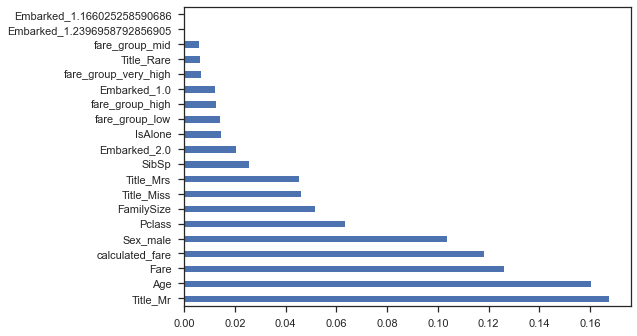

In [39]:
feat_importances = pd.Series(best_model.feature_importances_, index=train.drop('Survived', axis=1).columns)
feat_importances.nlargest(20).plot(kind='barh')


In [40]:
feat_importances

Pclass                         0.063501
Age                            0.160277
SibSp                          0.025603
Fare                           0.126197
FamilySize                     0.051433
IsAlone                        0.014389
calculated_fare                0.118099
Sex_male                       0.103718
Title_Miss                     0.046173
Title_Mr                       0.167635
Title_Mrs                      0.045229
Title_Rare                     0.006163
fare_group_high                0.012376
fare_group_low                 0.013960
fare_group_mid                 0.005979
fare_group_very_high           0.006581
Embarked_1.0                   0.012190
Embarked_1.166025258590686     0.000007
Embarked_1.2396958792856905    0.000155
Embarked_2.0                   0.020334
dtype: float64

In [41]:
from sklearn.svm import SVC
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn import model_selection

## Applying ANN

In [42]:
import tensorflow as tf 


In [ ]:
# Initializing the ANN
classifier_ann = tf.keras.models.Sequential() #We will add layers afterwards

# Adding the input layer and first hidden layer
"""nodes = number of output nodes (input nodes are taken care automatically) , activation - activation funct used  """
classifier_ann.add(tf.keras.layers.Dense(units = 7 , activation='relu')) 

# Adding second hidden layer
classifier_ann.add(tf.keras.layers.Dense(units = 7 , activation='relu')) 

# Adding the output layer (We want to have probabilities as output)
"""If no of categories is 3 or more then output_dim = 3 (or more) , activation = softmax""" 
classifier_ann.add(tf.keras.layers.Dense(units = 1 , activation='sigmoid')) 

# Compile ANN (Applying SGD) - The backpropagation step
classifier_ann.compile(optimizer='adam', loss='binary_crossentropy' , metrics= ['accuracy'] )

# Fitting the ANN to the training set
classifier_ann.fit(X_train , y_train, batch_size= 10 , epochs= 400) 

In [44]:
# Predict
y_pred_ann = classifier_ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.75)

print(classification_report(y_test,y_pred_ann))

print(confusion_matrix(y_test,y_pred_ann),"\n")

print("accuracy score: ", accuracy_score(y_test, y_pred_ann))

precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       184
         1.0       0.83      0.63      0.72       111

    accuracy                           0.81       295
   macro avg       0.82      0.78      0.79       295
weighted avg       0.82      0.81      0.81       295

[[170  14]
 [ 41  70]] 

accuracy score:  0.8135593220338984
